In [181]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [182]:
# Load the data
df = pd.read_csv('abilene_reservoir.csv')
df.drop(columns=['dead_pool_capacity', 'conservation_capacity', 'water_level'], inplace=True)
# set date as index
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)
df

,surface_area,reservoir_storage,conservation_storage,percent_full
date,,,,
1999-03-05,280.1,2314,2314,29.3
1999-03-06,279.5,2308,2308,29.2
1999-03-07,278.6,2299,2299,29.1
1999-03-08,278.6,2299,2299,29.1
1999-03-09,278.9,2302,2302,29.1
...,...,...,...,...
2024-04-19,167.0,922,922,11.7
2024-04-20,167.8,928,928,11.7
2024-04-21,168.4,937,937,11.9


According to Water for Texas

Conservation Capacity
The capacity of a reservoir's conservation pool; if the reservoir is shared with another state or country then conservation capacity refers only to the portion that belongs to Texas.

Conservation Storage
The amount of water present within a reservoir's conservation pool. Conservation storage is sometimes referred to as normal or multipurpose storage (USACE 2018). If reservoir operations are based on a normal operating level, conservation storage is calculated based on the normal operating level. If the reservoir is shared with another state or country then conservation storage refers only to the portion that belongs to Texas.

Percent Full
The ratio of conservation storage to conservation capacity expressed as a percentage.



# Data Analysis

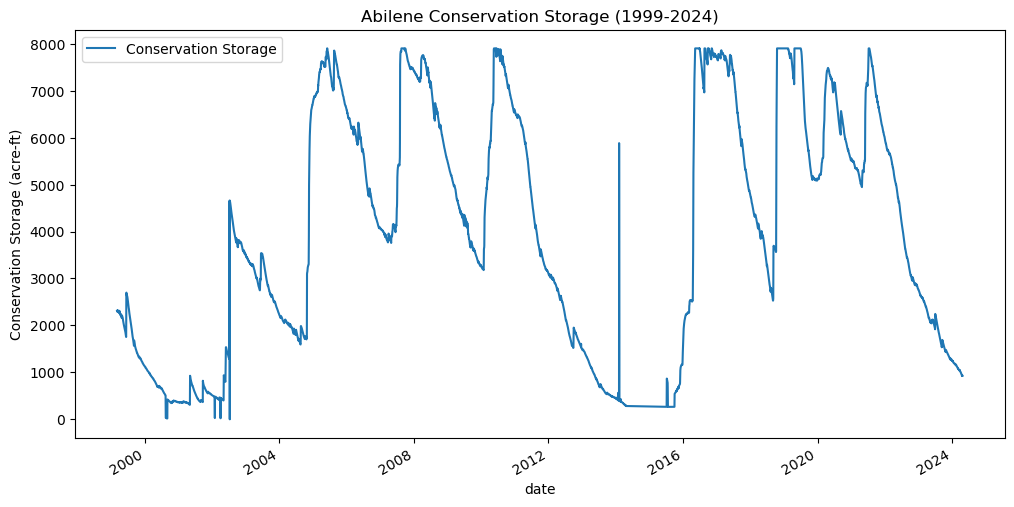

In [183]:
# plot conservation storage with axis label and legend
plt.figure(figsize=(12, 6))
df['conservation_storage'].plot()
plt.ylabel('Conservation Storage (acre-ft)')
plt.title('Abilene Conservation Storage (1999-2024)')
plt.legend(['Conservation Storage'])
plt.show()

There is large gap of missing values around 2015, and it shouldn't be filled since it would produce bias in the data.

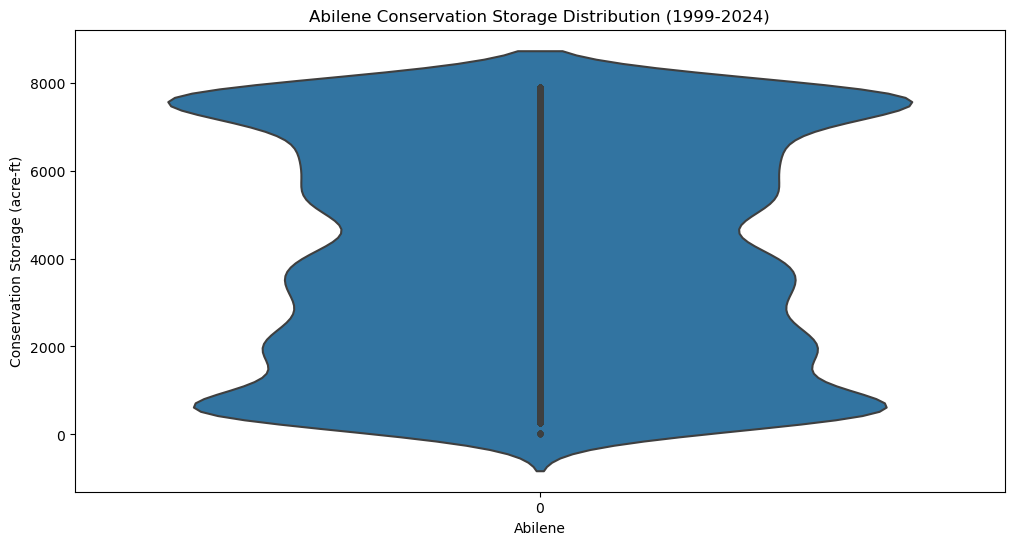

In [184]:
# plot conservation storage violin plot with axis label and title
plt.figure(figsize=(12, 6))
sns.violinplot(data=df['conservation_storage'], inner='point')
plt.ylabel('Conservation Storage (acre-ft)')
plt.xlabel('Abilene')
plt.title('Abilene Conservation Storage Distribution (1999-2024)')
plt.show()

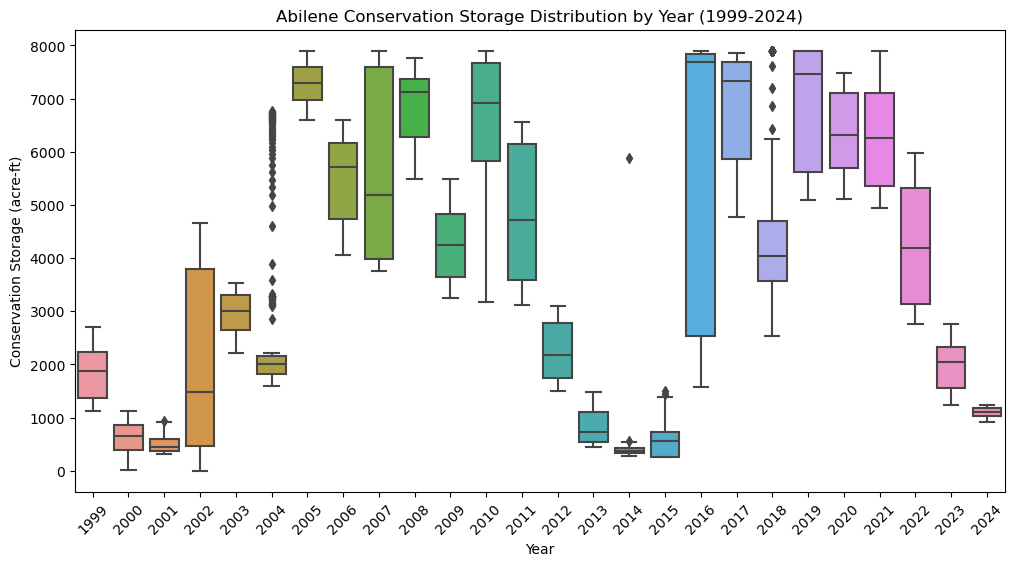

In [185]:
# box plot yearly conservation storage with axis label and title
plt.figure(figsize=(12, 6))
df['year'] = df.index.year
sns.boxplot(x='year', y='conservation_storage', data=df)
plt.ylabel('Conservation Storage (acre-ft)')
plt.xlabel('Year')
plt.title('Abilene Conservation Storage Distribution by Year (1999-2024)')
plt.xticks(rotation=45)
plt.show()

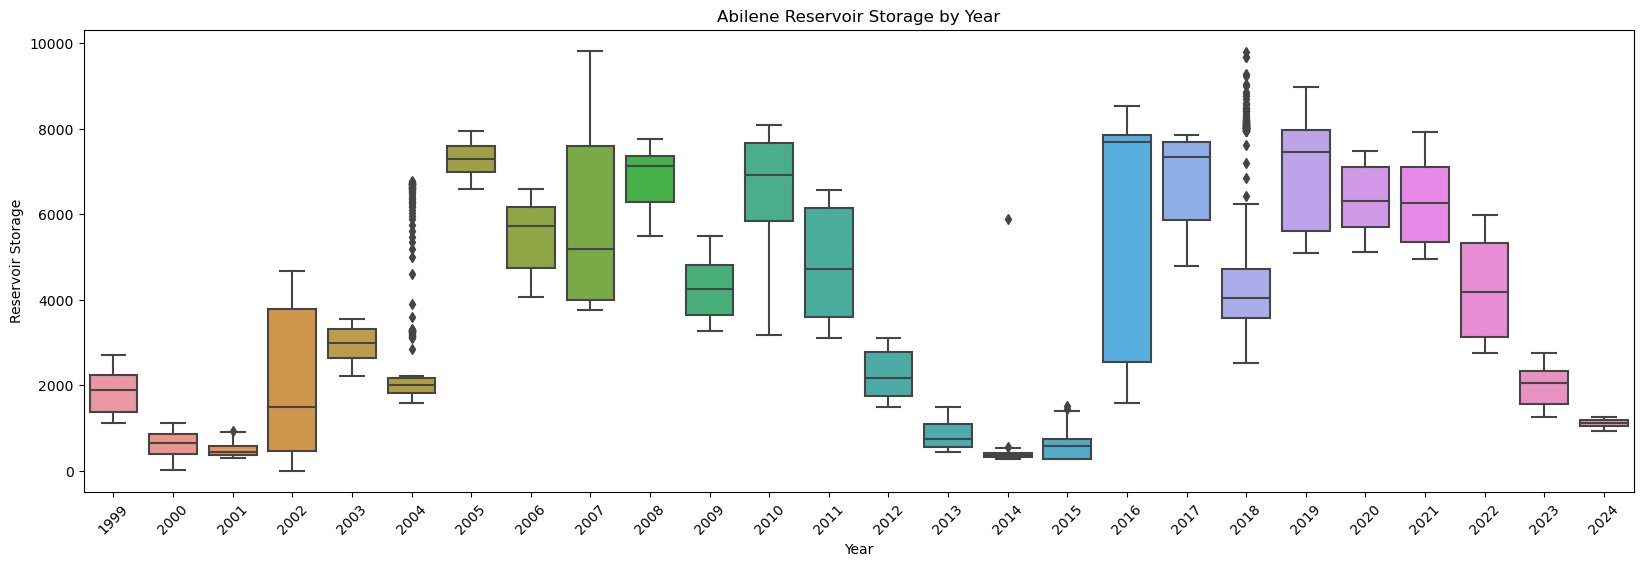

In [186]:
# box plot yearly
yearly_df = df.copy()
yearly_df['year'] = yearly_df.index.year
plt.figure(figsize=(20, 6))
sns.boxplot(x='year', y='reservoir_storage', data=yearly_df)
plt.title('Abilene Reservoir Storage by Year')
plt.xlabel('Year')
plt.ylabel('Reservoir Storage')
plt.xticks(rotation=45)
plt.show()

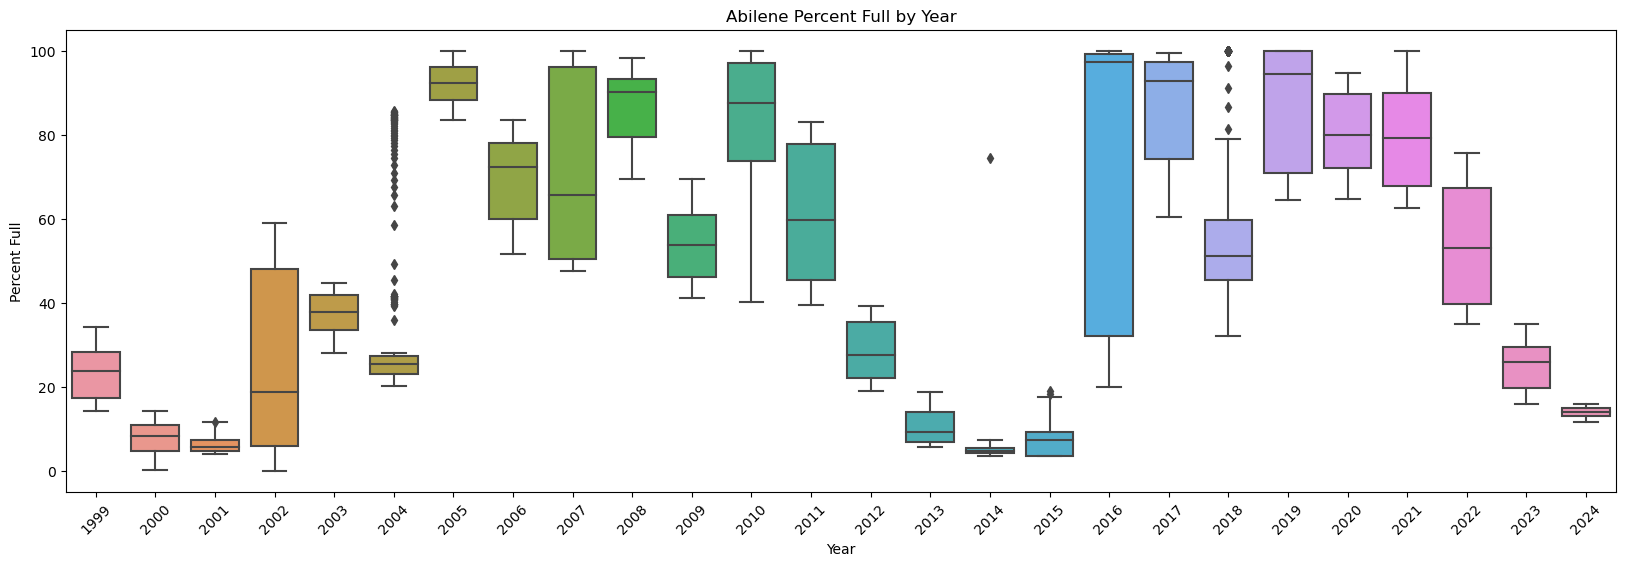

In [187]:
# box plot yearly
plt.figure(figsize=(20, 6))
sns.boxplot(x='year', y='percent_full', data=yearly_df)
plt.title('Abilene Percent Full by Year')
plt.xlabel('Year')
plt.ylabel('Percent Full')
plt.xticks(rotation=45)
plt.show()

/Users/Khoi/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1000x2000 with 0 Axes>

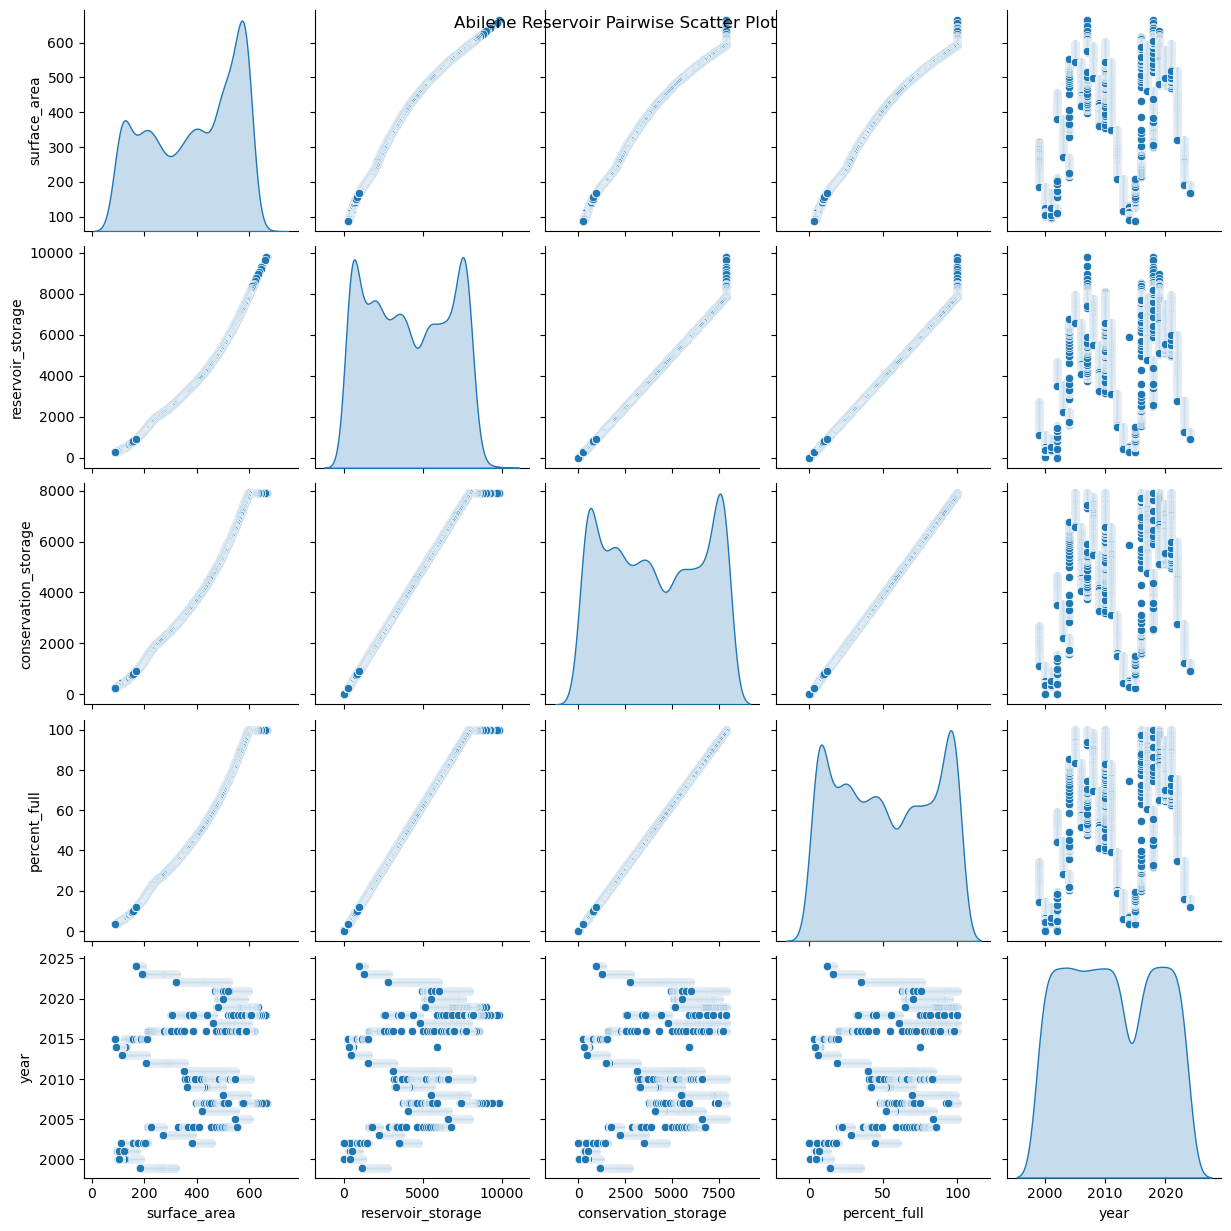

In [188]:
# pairwise scatter plot
plt.figure(figsize=(10, 20))
# set padding between suptitle and the subplots
plt.subplots_adjust(top=0.95)
sns.pairplot(df, diag_kind='kde')
plt.suptitle('Abilene Reservoir Pairwise Scatter Plot')
plt.show()

The reservoir storage consists of dead pool, conservation pool and flood pool. Since the flood pool and dead pool data is not available in Abilene, the reservoir storage is equal to conservation pool. Therefore it is reasonable why there is a strong positive relationship between the two variables.

The percent_full variable indicates the capacity of conversation storage, which is calculated by conservation_storage / conservation_capacity. Since the conservation capacity doesn't change in this dataset, this explains the positive relationship between the two variables.

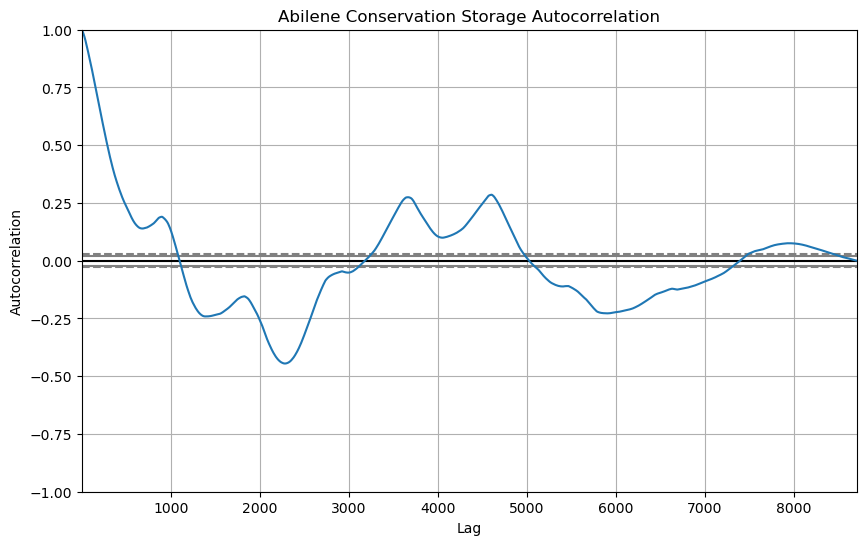

In [189]:
# autocorrelation plot
plt.figure(figsize=(10, 6))
pd.plotting.autocorrelation_plot(df['conservation_storage'])
plt.title('Abilene Conservation Storage Autocorrelation')
plt.show()

<Figure size 1000x600 with 0 Axes>

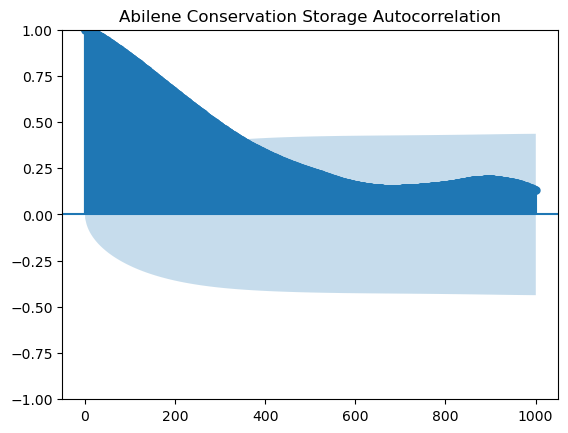

In [190]:
# acf plot
from statsmodels.graphics.tsaplots import plot_acf
plt.figure(figsize=(10, 6))
plot_acf(df['conservation_storage'], lags=1000)
plt.title('Abilene Conservation Storage Autocorrelation')
plt.show()

<Figure size 1000x600 with 0 Axes>

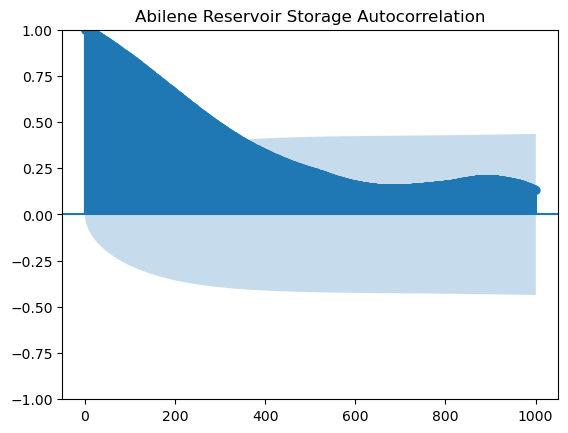

In [191]:
# acf plot of reservoir storage
plt.figure(figsize=(10, 6))
plot_acf(df['reservoir_storage'], lags=1000)
plt.title('Abilene Reservoir Storage Autocorrelation')
plt.show()

<Figure size 1000x600 with 0 Axes>

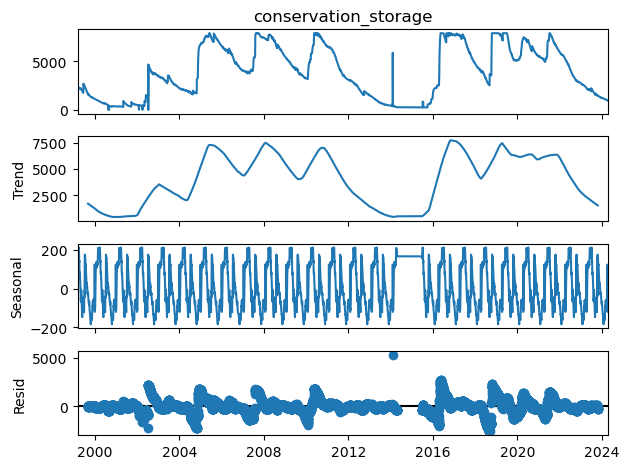

In [192]:
# seasonal decomposition
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df['conservation_storage'], period=365)
plt.figure(figsize=(10, 6))
decomposition.plot()
plt.show()

The seasonal composition indicates that the conservation_storage variable has a seasonality.

<Figure size 1000x600 with 0 Axes>

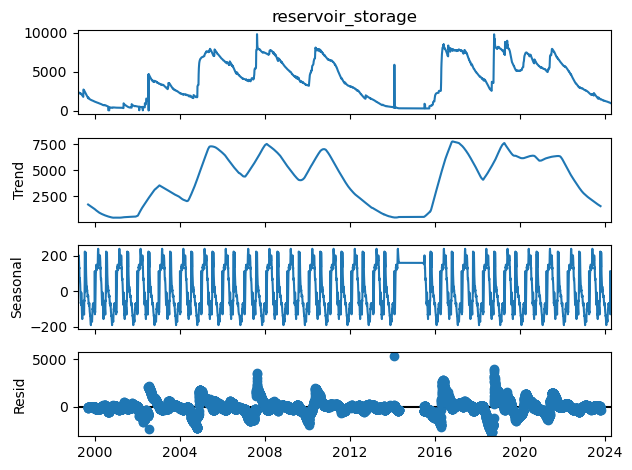

In [193]:
# seasonal decomposition for reservoir storage
decomposition = seasonal_decompose(df['reservoir_storage'], period=365)
plt.figure(figsize=(10, 6))
decomposition.plot()
plt.show()

# Prediction Model

In [194]:
# create 50 columns for each lag
for i in range(1, 30):
    df[f'conservation_storage_{i}'] = df['conservation_storage'].shift(i)

# drop rows with NaN values
df.dropna(inplace=True)

In [195]:
df

,surface_area,reservoir_storage,conservation_storage,percent_full,year,conservation_storage_1,conservation_storage_2,conservation_storage_3,conservation_storage_4,conservation_storage_5,...,conservation_storage_20,conservation_storage_21,conservation_storage_22,conservation_storage_23,conservation_storage_24,conservation_storage_25,conservation_storage_26,conservation_storage_27,conservation_storage_28,conservation_storage_29
date,,,,,,,,,,,,,,,,,,,,,
1999-04-03,278.3,2296,2296,29.1,1999,2296.0,2302.0,2305.0,2308.0,2311.0,...,2317.0,2323.0,2287.0,2290.0,2293.0,2302.0,2299.0,2299.0,2308.0,2314.0
1999-04-04,276.8,2284,2284,28.9,1999,2296.0,2296.0,2302.0,2305.0,2308.0,...,2305.0,2317.0,2323.0,2287.0,2290.0,2293.0,2302.0,2299.0,2299.0,2308.0
1999-04-05,276.0,2278,2278,28.8,1999,2284.0,2296.0,2296.0,2302.0,2305.0,...,2299.0,2305.0,2317.0,2323.0,2287.0,2290.0,2293.0,2302.0,2299.0,2299.0
1999-04-06,274.0,2263,2263,28.6,1999,2278.0,2284.0,2296.0,2296.0,2302.0,...,2296.0,2299.0,2305.0,2317.0,2323.0,2287.0,2290.0,2293.0,2302.0,2299.0
1999-04-07,273.1,2254,2254,28.5,1999,2263.0,2278.0,2284.0,2296.0,2296.0,...,2293.0,2296.0,2299.0,2305.0,2317.0,2323.0,2287.0,2290.0,2293.0,2302.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-04-19,167.0,922,922,11.7,2024,930.0,933.0,940.0,944.0,947.0,...,1016.0,1018.0,1023.0,1028.0,1034.0,1041.0,1039.0,1044.0,1050.0,1043.0
2024-04-20,167.8,928,928,11.7,2024,922.0,930.0,933.0,940.0,944.0,...,1013.0,1016.0,1018.0,1023.0,1028.0,1034.0,1041.0,1039.0,1044.0,1050.0
2024-04-21,168.4,937,937,11.9,2024,928.0,922.0,930.0,933.0,940.0,...,1013.0,1013.0,1016.0,1018.0,1023.0,1028.0,1034.0,1041.0,1039.0,1044.0


In [196]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, median_absolute_error

def print_metrics(y_test, y_pred):
    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    medae = median_absolute_error(y_test, y_pred)
    residuals = y_test - y_pred
    residual_std = np.std(residuals)
    maxerr = np.max(np.abs(residuals))
   
    # Print metrics
    print("Mean Squared Error (MSE):", mse)
    print("R-squared (R2):", r2)
    print("Mean Absolute Error (MAE):", mae)
    print("Root Mean Squared Error (RMSE):", rmse)
    print("Median Absolute Error (MedAE):", medae)
    print("Residual Standard Deviation:", residual_std)
    print("Maximum Error (MaxErr):", maxerr)

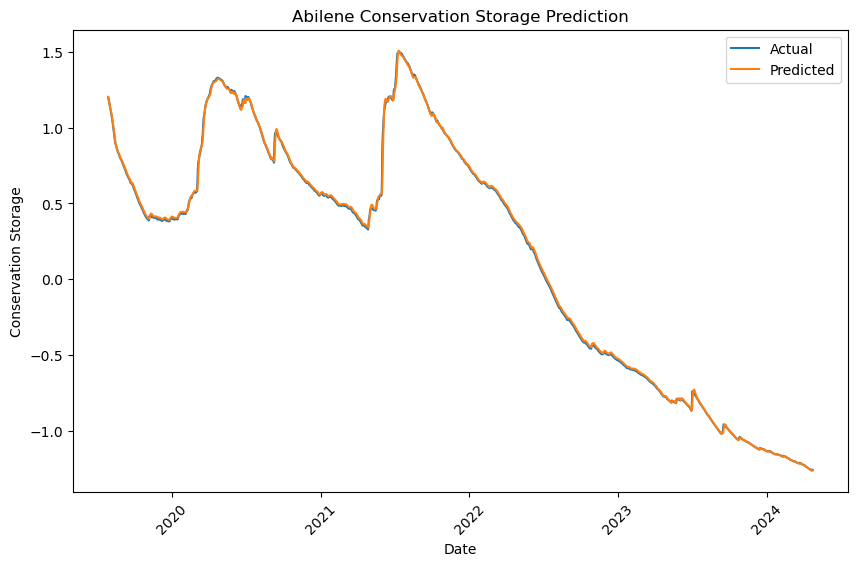

In [197]:
# create X and y, with X being the lag columns and y being the target column
X = df.drop(['conservation_storage', 'percent_full', 'reservoir_storage'], axis=1)
y = df['conservation_storage']

# normalize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)
y = scaler.fit_transform(y.values.reshape(-1, 1))

# split the data into training and testing sets and remain the time order
split_index = int(0.8 * len(df))
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# train a linear regression model
from sklearn.linear_model import LinearRegression
model = LinearRegression(n_jobs=-1)
model.fit(X_train, y_train)

# make predictions
y_pred = model.predict(X_test)

# plot the predictions
plt.figure(figsize=(10, 6))
plt.plot(df.index[split_index:], y_test, label='Actual')
plt.plot(df.index[split_index:], y_pred, label='Predicted')
plt.title('Abilene Conservation Storage Prediction')
plt.xlabel('Date')
plt.ylabel('Conservation Storage')
plt.legend()
plt.xticks(rotation=45)
plt.show()

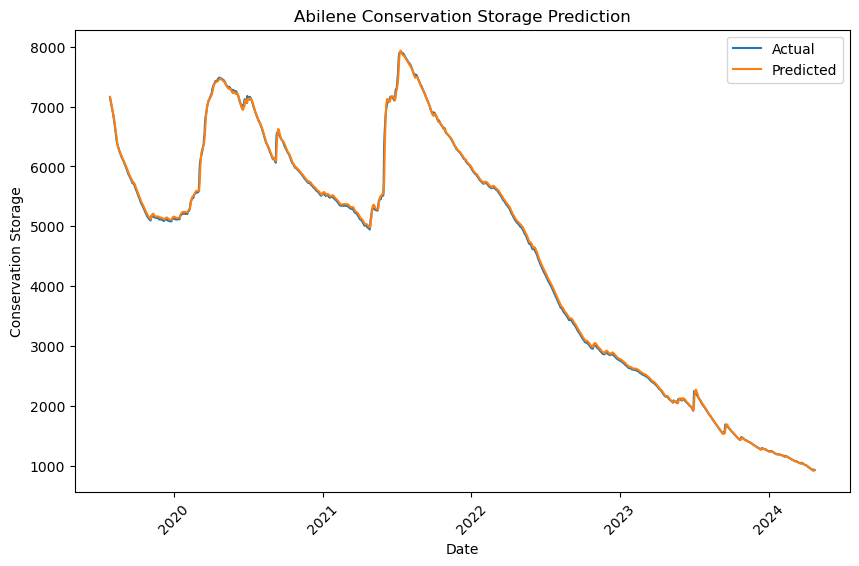

In [198]:
# convert the predictions back to the original scale
y_pred = scaler.inverse_transform(y_pred)
y_test = scaler.inverse_transform(y_test)

# plot the predictions
plt.figure(figsize=(10, 6))
plt.plot(df.index[split_index:], y_test, label='Actual')
plt.plot(df.index[split_index:], y_pred, label='Predicted')
plt.title('Abilene Conservation Storage Prediction')
plt.xlabel('Date')
plt.ylabel('Conservation Storage')
plt.legend()
plt.xticks(rotation=45)
plt.show()

In [199]:
print_metrics(y_test, y_pred)

Mean Squared Error (MSE): 1328.8925370532936
R-squared (R2): 0.9996866499569749
Mean Absolute Error (MAE): 22.895166676210774
Root Mean Squared Error (RMSE): 36.45397834329325
Median Absolute Error (MedAE): 19.85718904953501
Residual Standard Deviation: 34.64783967855562
Maximum Error (MaxErr): 615.818988932806


The R<sup>2</sup> score is exceptionally high, indicating that the model can translate well with the substantial change in variable. However, based on the errors, it does not indicates well enough with the actual value.

In [200]:
# convert the predictions to exact values
y_pred = y_pred.flatten()
y_test = y_test.flatten()

# convert y_pred from number format of 1.23456789e+01 to 12.3456789
y_pred = np.array([float(f'{x:.2f}') for x in y_pred])

# display a dataframe with the actual and predicted values
df_pred = pd.DataFrame({'actual': y_test.flatten(), 'predicted': y_pred.flatten().astype(float)})
df_pred

,actual,predicted
0,7149.0,7163.56
1,7114.0,7125.13
2,7079.0,7089.13
3,7044.0,7054.19
4,7009.0,7019.42
...,...,...
1726,922.0,921.56
1727,928.0,916.31
1728,937.0,918.01
1729,933.0,923.86


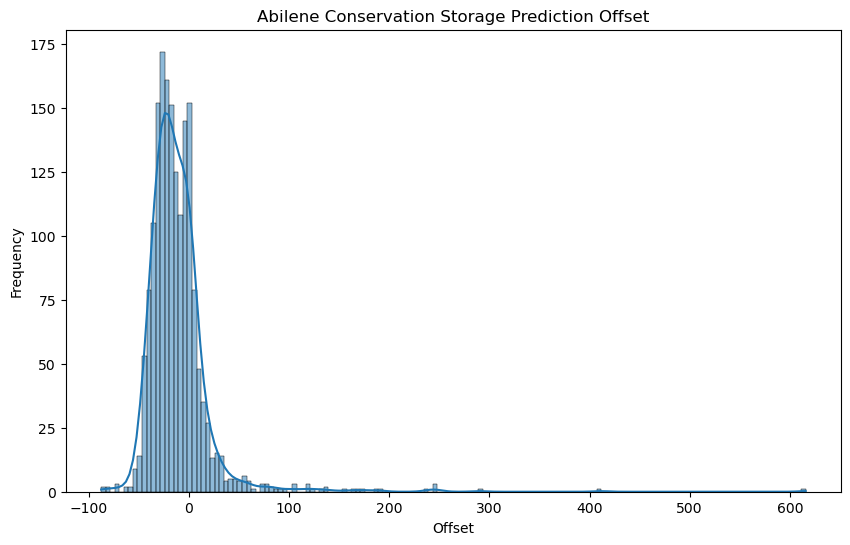

In [201]:
# plot offset between actual and predicted values in histogram
plt.figure(figsize=(10, 6))
sns.histplot(y_test - y_pred, kde=True)
plt.title('Abilene Conservation Storage Prediction Offset')
plt.xlabel('Offset')
plt.ylabel('Frequency')
plt.show()

In [272]:
# train with LSTM
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Flatten, Reshape
from keras.optimizers import Adam

# split the data into training, validation and testing sets and remain the time order
split_index = int(0.8 * len(df))

X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# create the model
model = Sequential()
model.add(Reshape((1, X_train.shape[1]), input_shape=(X_train.shape[1],)))
model.add(LSTM(16, activation='relu', input_shape=(1, X_train.shape[1])))
model.add(Dense(1))
model.add(Flatten())
model.compile(optimizer=Adam(0.0001), loss='mae')

# early stopping
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

# train the model 5 times and get the median metrics
mse = []
r2 = []
mae = []
rmse = []
medae = []
residual_std = []
maxerr = []

for i in range(5):
    y_train, y_test = y[:split_index], y[split_index:]
    history = model.fit(X_train, y_train, epochs=1000, batch_size=32, validation_split=0.2, callbacks=[early_stopping], verbose=0)
    y_pred = model.predict(X_test)
    y_pred = scaler.inverse_transform(y_pred)
    y_test = scaler.inverse_transform(y_test)
    mse.append(mean_squared_error(y_test, y_pred))
    r2.append(r2_score(y_test, y_pred))
    mae.append(mean_absolute_error(y_test, y_pred))
    rmse.append(np.sqrt(mse[-1]))
    medae.append(median_absolute_error(y_test, y_pred))
    residuals = y_test - y_pred.flatten()
    residual_std.append(np.std(residuals))
    maxerr.append(np.max(np.abs(residuals)))


/Users/Khoi/anaconda3/lib/python3.11/site-packages/keras/src/layers/reshaping/reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/Users/Khoi/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 313us/step
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 280us/step
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 278us/step
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 276us/step


In [273]:
# get median of metrics
print("Mean Squared Error (MSE):", np.median(mse))
print("R-squared (R2):", np.median(r2))
print("Mean Absolute Error (MAE):", np.median(mae))
print("Root Mean Squared Error (RMSE):", np.median(rmse))
print("Median Absolute Error (MedAE):", np.median(medae))
print("Residual Standard Deviation:", np.median(residual_std))
print("Maximum Error (MaxErr):", np.median(maxerr))

Mean Squared Error (MSE): 12812.411395532557
R-squared (R2): 0.9969788605548587
Mean Absolute Error (MAE): 76.36584507916305
Root Mean Squared Error (RMSE): 113.19192283697878
Median Absolute Error (MedAE): 54.36669921875
Residual Standard Deviation: 2877.9939707197323
Maximum Error (MaxErr): 6964.897705078125


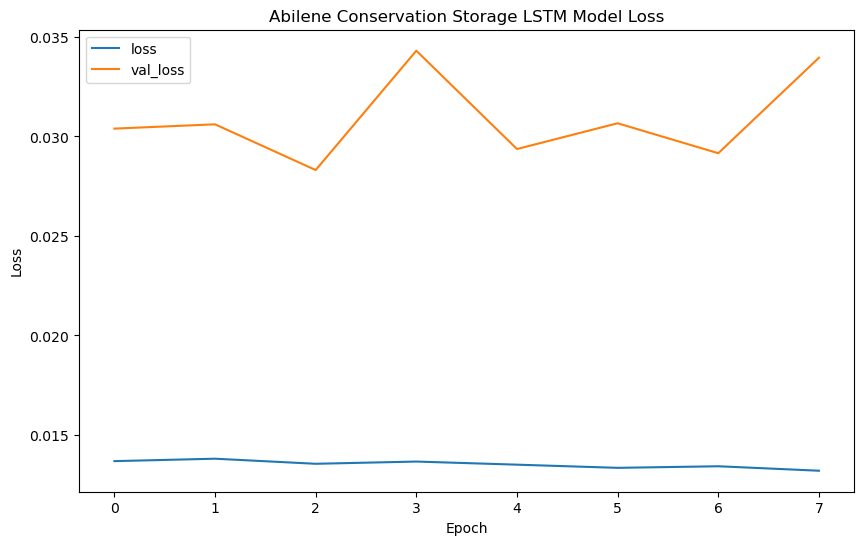

In [274]:
# plot loss and val_loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Abilene Conservation Storage LSTM Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

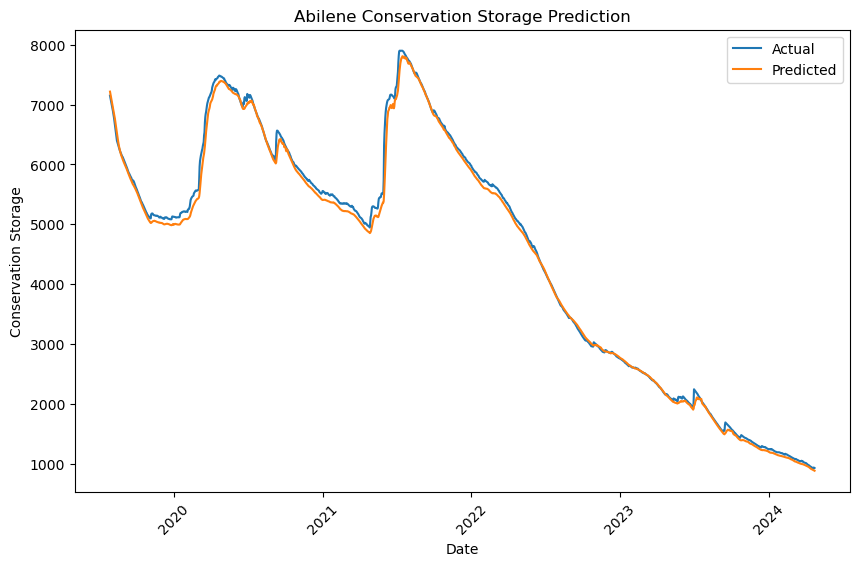

In [275]:
# plot the predictions
plt.figure(figsize=(10, 6))
plt.plot(df.index[split_index:], y_test, label='Actual')
plt.plot(df.index[split_index:], y_pred, label='Predicted')
plt.title('Abilene Conservation Storage Prediction')
plt.xlabel('Date')
plt.ylabel('Conservation Storage')
plt.legend()
plt.xticks(rotation=45)
plt.show()

In [276]:
print_metrics(y_test, y_pred)

Mean Squared Error (MSE): 11023.990265379332
R-squared (R2): 0.99740056646595
Mean Absolute Error (MAE): 71.04362486911468
Root Mean Squared Error (RMSE): 104.99519162980432
Median Absolute Error (MedAE): 51.10546875
Residual Standard Deviation: 83.62780981281992
Maximum Error (MaxErr): 878.3134765625


The LSTM model provides the same characteristic, with exceptionally high R<sup>2</sup> score and worse errors.

In [277]:
# create a dataframe with the actual and predicted values
df_pred = pd.DataFrame({'actual': y_test.flatten(), 'predicted': y_pred.flatten().astype(float), 'offset': y_test.flatten() - y_pred.flatten().astype(float)})
max(df_pred['offset']), min(df_pred['offset'])

(878.3134765625, -127.02978515625)

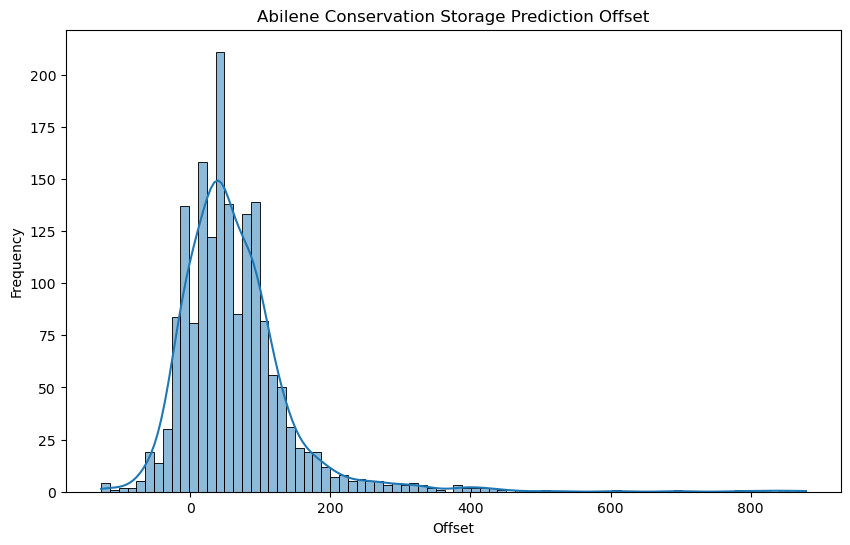

In [278]:
# plot offset between actual and predicted values in histogram
plt.figure(figsize=(10, 6))
sns.histplot(y_test.flatten() - y_pred.flatten(), kde=True)
plt.title('Abilene Conservation Storage Prediction Offset')
plt.xlabel('Offset')
plt.ylabel('Frequency')
plt.show()